# Testing Model3 on Dataset3

## Counting shapes in binary images: different shapes with same size/radii

This notebook tests the CNN model for the Counting simple shapes (circles, squares or diamonds) experiment, more specifically trained on different shapes with the same size/radii - Dataset3 (see the training [Notebook](https://github.com/NLeSC/XAI/blob/master/Software/CNNcountDemo/TrainModel3DiffShapesSameSize.ipynb)) and tested on Dataset3. The 'CNNcount' code resides in a [git repository](https://github.com/NLeSC/XAI/tree/master/Software/CNNcountDemo). 

### Settings

In [1]:
# Imports
import warnings
warnings.simplefilter('ignore')

import numpy as np
from numpy import load
import os.path
import matplotlib.pyplot as plt

import keras.backend as K
if(K.tensorflow_backend):
    import tensorflow as tf
    tf.logging.set_verbosity(tf.logging.ERROR)
from keras.utils import np_utils
from keras.models import load_model

from CNNcount import shape_images as si
from CNNcount import model_count_shapes as mcs

Using TensorFlow backend.


### Loading of pre-generated data and formatting of the data and labels.

In [2]:
# filename for loading the data from the NPZ files (NumPy compressed)
diff_shapes_same_radius_fname = "/home/elena/eStep/XAI/Data/CountingShapes/diff_shapes_same_radius_60k.npz"
# input image dimensions and number of classes
img_rows, img_cols = 64, 64
num_classes = 3

#### Data formatting

The file containing images of different shapes (circles, squares or diamonds) with same radius already exist!
Size of testing data:  (6000, 64, 64, 1) and labels:  (6000,)


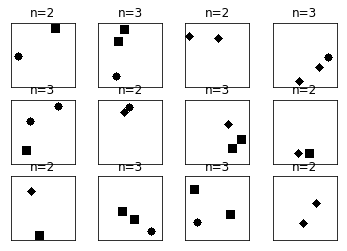

In [3]:
# load the set of NIM images with different types and same radius and get the test subsets
if os.path.isfile(diff_shapes_same_radius_fname): # already generated- just load
    print ("The file containing images of different shapes (circles, squares or diamonds) with same radius already exist!")
    # load from NPZ file for display
    _, _, images_test, _, _, labels_test = si.load_split_data(diff_shapes_same_radius_fname)
    
    
    if K.image_data_format() == 'channels_first':
        images_test = images_test.reshape(images_test.shape[0], 1, img_rows, img_cols)

    print("Size of testing data: ", np.shape(images_test), "and labels: ", np.shape(labels_test))
else: # missing data
    print ("The file containing images of different shapes (circles, squares or diamonds) with same radius does not exist!")
    print("Use the GenerateShapeImages notebook to generate the experimental data.") 
    
# plot random 12 of the test images
si.plot_12images(images_test, labels_test)    

#### Labels formatting.

In [4]:
# convert class vectors to binary class matrices
labels_test = np_utils.to_categorical(labels_test-1, num_classes=None)

In [5]:
print(labels_test)
print('labels_test shape:', labels_test.shape)

[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]
labels_test shape: (6000, 3)


#### CNN model.

In [6]:
# filename for model saving
diff_shape_same_radius_model_fname = "/home/elena/eStep/XAI/Data/CountingShapes/model_diff_shapes_same_radius.h5"
# load the trained model
model = load_model(diff_shape_same_radius_model_fname) 
print("Loaded model from disk")

Loaded model from disk


#### Evaluate on test images

In [7]:
score = model.evaluate(images_test, labels_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.00026691883569583295
Test accuracy: 1.0


In [8]:
# constants
NMIN, NMAX = 1, 3  # nbr of shapes
RMIN, RMAX = 2, 6  # shape radius

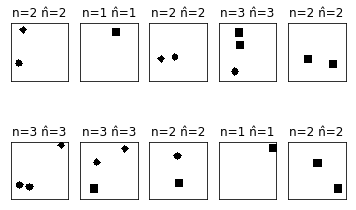

In [9]:
# generate 10 random images and predict the number of shapes using the trained model
num_shapes = len(si.SHAPES)
shape_radius = int((RMIN+RMAX)/2)
for i in range(10):
    n = int(np.random.randint(NMIN, NMAX+1))        
    shapes = [(np.random.randint(num_shapes), shape_radius) for _ in range(n)]
    img = si.generate_image(64, shapes, 0)    
    
    X = img[np.newaxis, :, :, np.newaxis].astype(np.float32)
    plt.subplot(2, 5, i+1)
    plt.imshow(img,cmap='binary')
    plt.xticks([])
    plt.yticks([])
    predictions = model.predict(X);
    #print(predictions)
    pred = np.argmax(predictions) + 1 # we subtracted 1 before
    #print(pred)
    plt.title('n=%d n̂=%d' % (n, pred))

plt.show()